In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from datasets import load_dataset

In [10]:
# extracting time-domain features

#librosa features

def extract_time_domain_features(y, sr):
    amplitude_envelope = np.abs(y)
    rms_energy = librosa.feature.rms(y=y)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)[0]
    return amplitude_envelope, rms_energy, zero_crossing_rate

# RMS manual implementation

# ZCR manual implementation

In [11]:
# loading the nEMO dataset
from datasets import load_dataset
ds = load_dataset("amu-cai/nEMO")


# nEMO samples processing

def process_sample(sample):
    audio_data = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    emotion = sample['emotion']
    ae, rms, zcr = extract_time_domain_features(audio_data, sampling_rate)
    return audio_data, sampling_rate, emotion, ae, rms, zcr

sample_surprised = ds['train'][3]
sample_neutral = ds['train'][1]
sample_sadness = ds['train'][4]
sample_happiness = ds['train'][7]
sample_fear = ds['train'][10]
sample_anger = ds['train'][15]

audio_data_surprised, sr_surprised, emotion_surprised, ae_surprised, rms_surprised, zcr_surprised = process_sample(sample_surprised)
audio_data_neutral, sr_neutral, emotion_neutral, ae_neutral, rms_neutral, zcr_neutral = process_sample(sample_neutral)
audio_data_sadness, sr_sadness, emotion_sadness, ae_sadness, rms_sadness, zcr_sadness = process_sample(sample_sadness)
audio_data_happiness, sr_happiness, emotion_happiness, ae_happiness, rms_happiness, zcr_happiness = process_sample(sample_happiness)
audio_data_fear, sr_fear, emotion_fear, ae_fear, rms_fear, zcr_fear = process_sample(sample_fear)
audio_data_anger, sr_anger, emotion_anger, ae_anger, rms_anger, zcr_anger = process_sample(sample_anger)

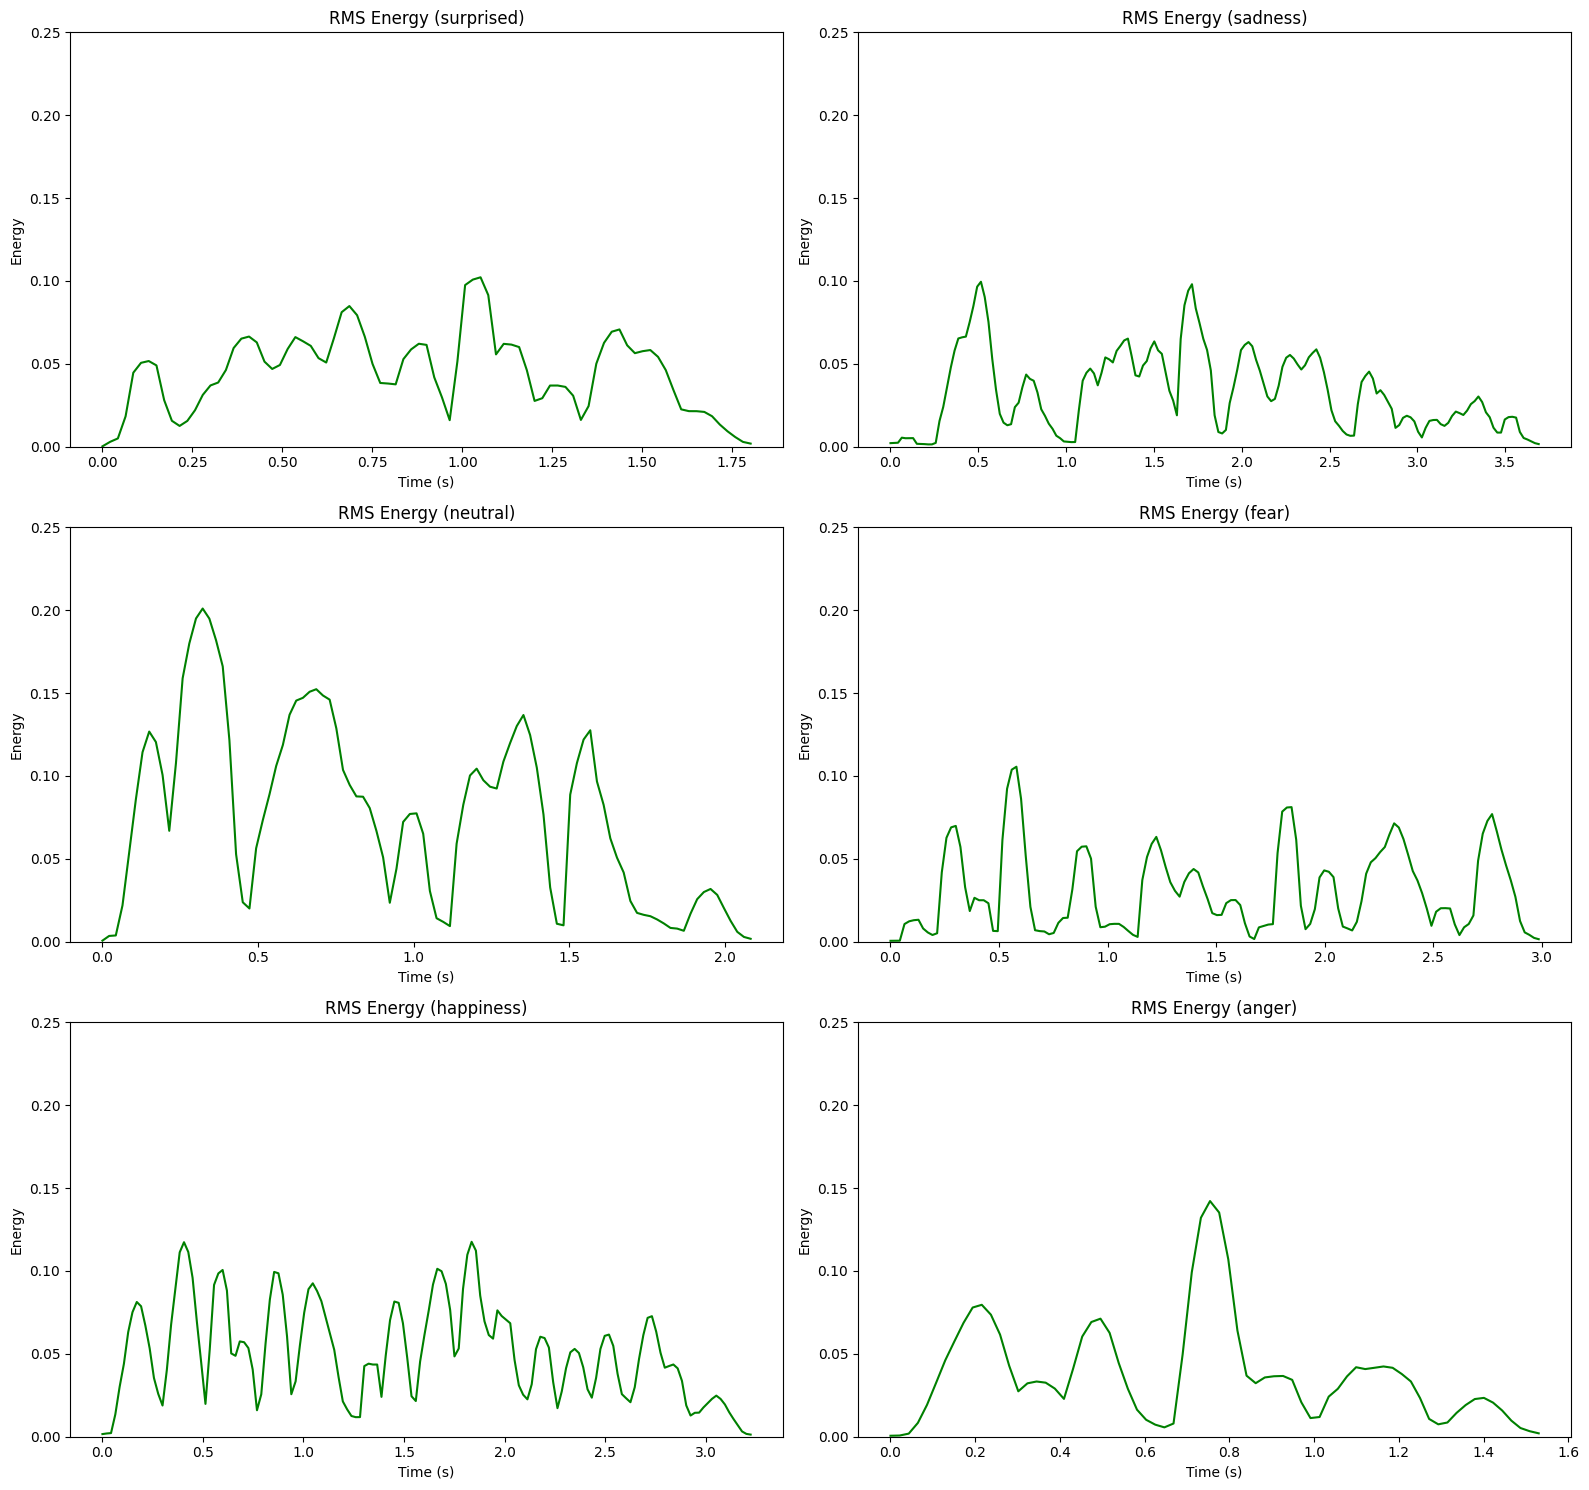

In [12]:
# plotting
plt.figure(figsize=(16, 15))

# RMS Energy surprised
plt.subplot(3, 2, 1)
plt.plot(np.linspace(0, len(audio_data_surprised)/sr_surprised, num=len(rms_surprised)), rms_surprised, color='g')
plt.title(f'RMS Energy ({emotion_surprised})')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.ylim(0, 0.25)

# RMS Energy nautral
plt.subplot(3, 2, 3)
plt.plot(np.linspace(0, len(audio_data_neutral)/sr_neutral, num=len(rms_neutral)), rms_neutral, color='g')
plt.title(f'RMS Energy ({emotion_neutral})')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.ylim(0, 0.25)

# RMS Energy happiness
plt.subplot(3, 2, 5)
plt.plot(np.linspace(0, len(audio_data_happiness)/sr_happiness, num=len(rms_happiness)), rms_happiness, color='g')
plt.title(f'RMS Energy ({emotion_happiness})')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.ylim(0, 0.25)

# RMS Energy sadness
plt.subplot(3, 2, 2)
plt.plot(np.linspace(0, len(audio_data_sadness)/sr_sadness, num=len(rms_sadness)), rms_sadness, color='g')
plt.title(f'RMS Energy ({emotion_sadness})')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.ylim(0, 0.25)

# RMS Energy fear
plt.subplot(3, 2, 4)
plt.plot(np.linspace(0, len(audio_data_fear)/sr_fear, num=len(rms_fear)), rms_fear, color='g')
plt.title(f'RMS Energy ({emotion_fear})')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.ylim(0, 0.25)

# RMS Energy anger
plt.subplot(3, 2, 6)
plt.plot(np.linspace(0, len(audio_data_anger)/sr_anger, num=len(rms_anger)), rms_anger, color='g')
plt.title(f'RMS Energy ({emotion_anger})')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.ylim(0, 0.25)

plt.tight_layout()
plt.show()


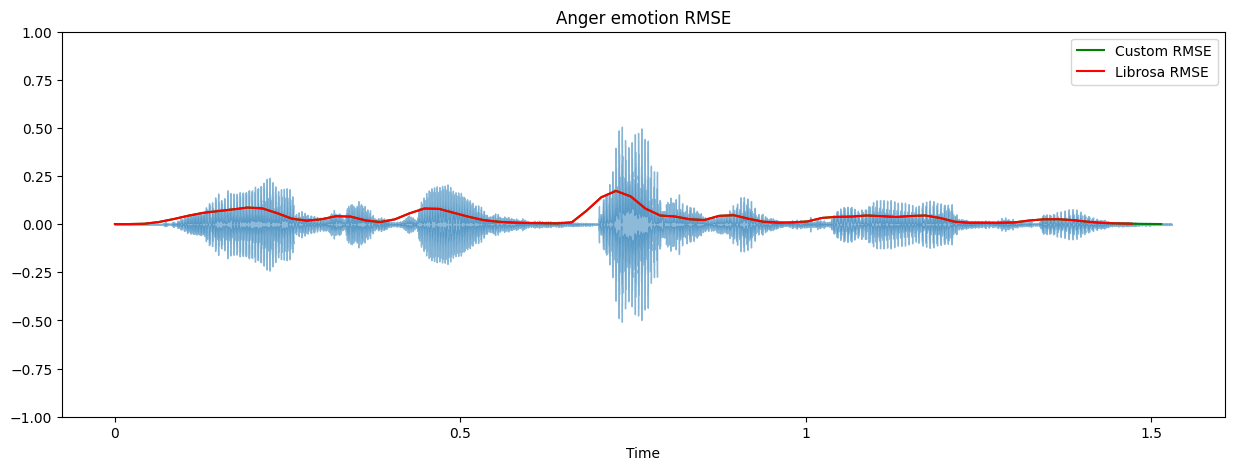

In [13]:
sampling_rate = sr_anger
FRAME_SIZE = 1024
HOP_LENGTH = 512

def rmse(signal, frame_size, hop_length):
    rmse = []

    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)


# sample processing
rms_anger = rmse(audio_data_anger, FRAME_SIZE, HOP_LENGTH)
frames = range(len(rms_anger))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
t = librosa.frames_to_time(np.arange(len(rms_anger)), sr=sampling_rate, hop_length=HOP_LENGTH)

rms_anger_from_librosa = librosa.feature.rms(y=audio_data_anger, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH, center=False)[0]
t_librosa = librosa.frames_to_time(np.arange(len(rms_anger_from_librosa)), sr=sampling_rate, hop_length=HOP_LENGTH)


# plotting
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data_anger, sr=sampling_rate, alpha=0.5)
plt.plot(t, rms_anger, color="g", label="Custom RMSE")
plt.plot(t_librosa, rms_anger_from_librosa, color="r", label="Librosa RMSE")
plt.ylim((-1, 1))
plt.title("Anger emotion RMSE")
plt.xlabel("Time")


plt.legend()
plt.show()


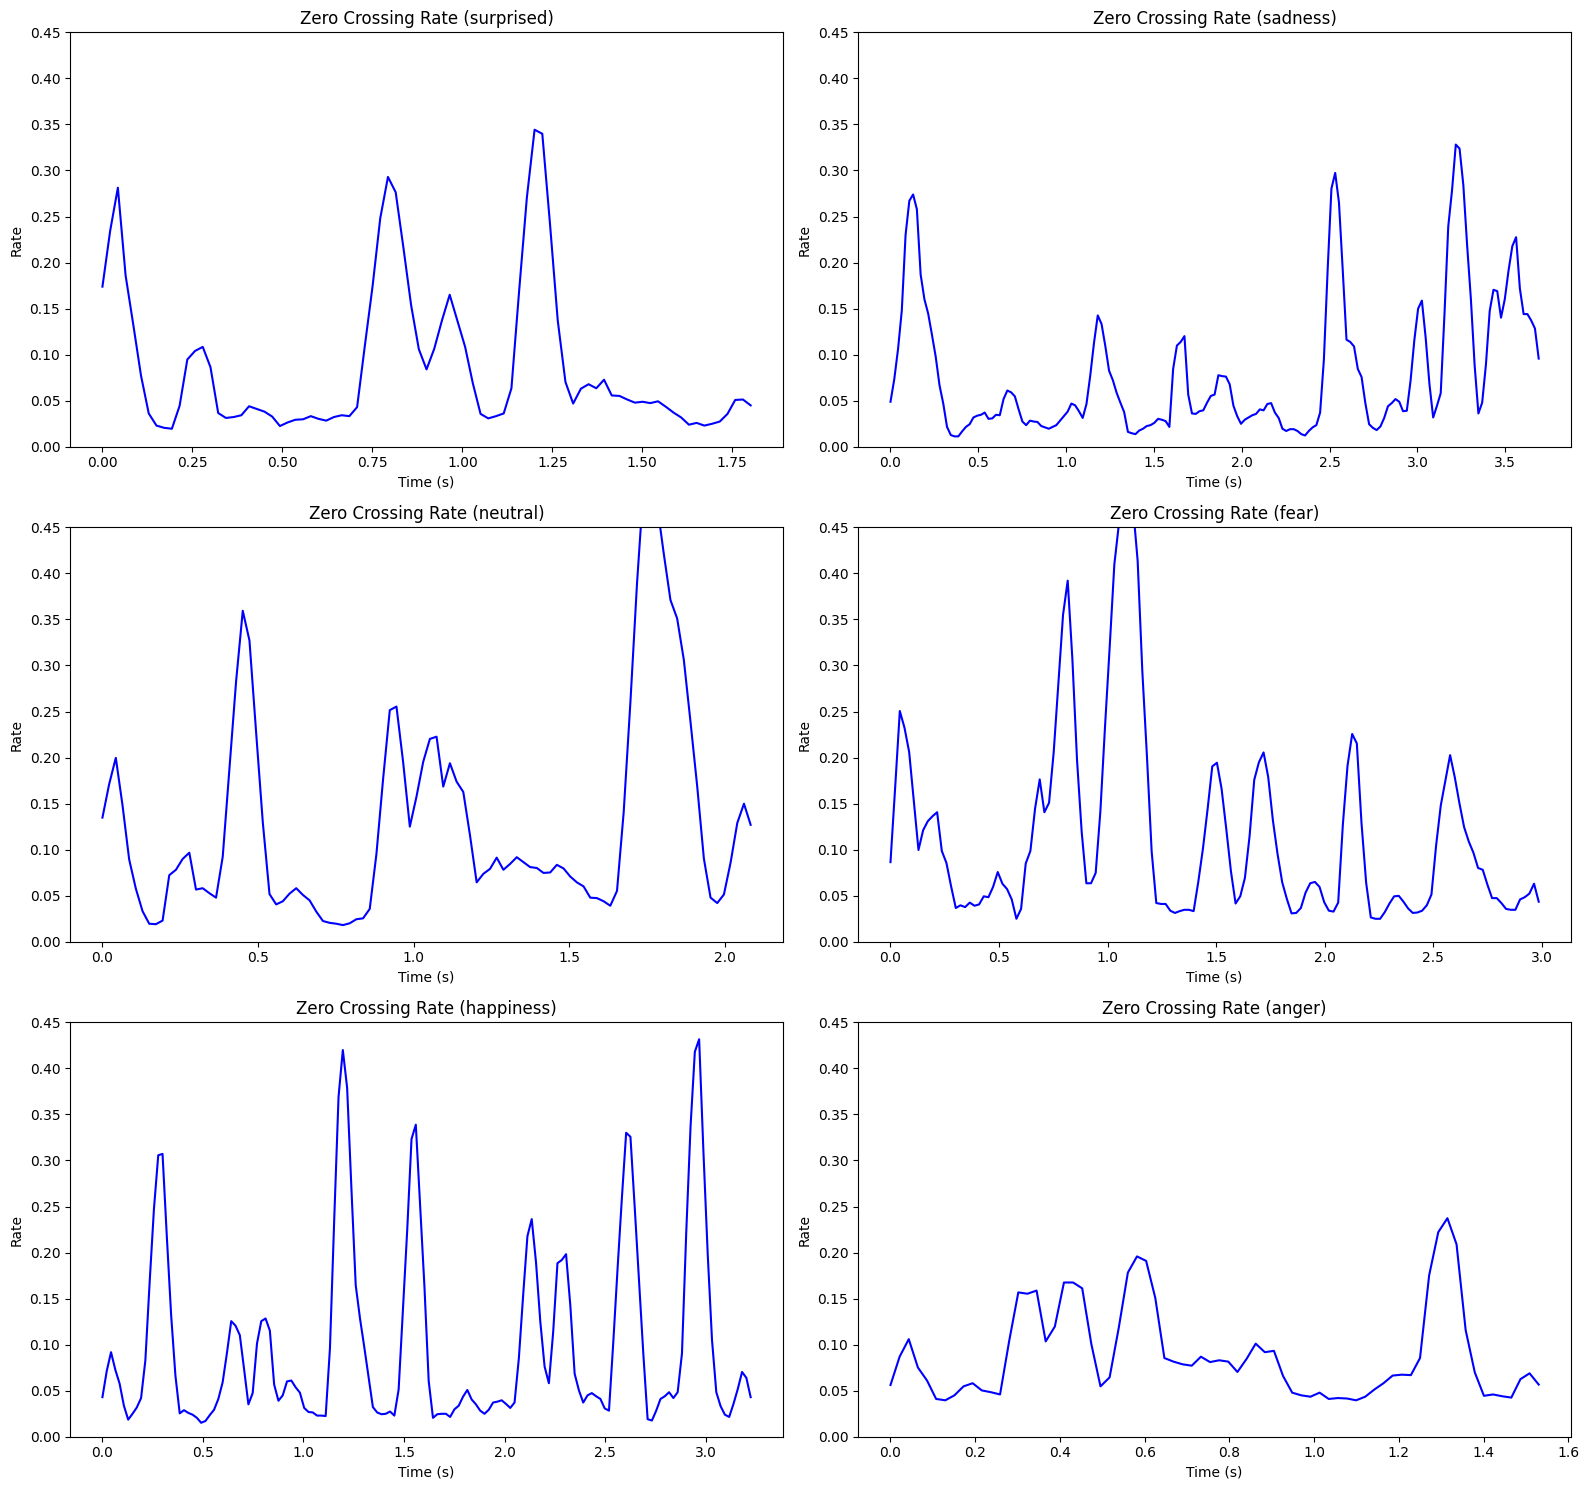

In [14]:
# plotting
plt.figure(figsize=(16, 15))

# ZCR surprised
plt.subplot(3, 2, 1)
plt.plot(np.linspace(0, len(audio_data_surprised)/sr_surprised, num=len(zcr_surprised)), zcr_surprised, color='b')
plt.title(f'Zero Crossing Rate ({emotion_surprised})')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.ylim(0, 0.45)

# RMS Energy nautral
plt.subplot(3, 2, 3)
plt.plot(np.linspace(0, len(audio_data_neutral)/sr_neutral, num=len(zcr_neutral)), zcr_neutral, color='b')
plt.title(f'Zero Crossing Rate ({emotion_neutral})')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.ylim(0, 0.45)

# RMS Energy happiness
plt.subplot(3, 2, 5)
plt.plot(np.linspace(0, len(audio_data_happiness)/sr_happiness, num=len(zcr_happiness)), zcr_happiness, color='b')
plt.title(f'Zero Crossing Rate ({emotion_happiness})')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.ylim(0, 0.45)

# RMS Energy sadness
plt.subplot(3, 2, 2)
plt.plot(np.linspace(0, len(audio_data_sadness)/sr_sadness, num=len(zcr_sadness)), zcr_sadness, color='b')
plt.title(f'Zero Crossing Rate ({emotion_sadness})')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.ylim(0, 0.45)

# RMS Energy fear
plt.subplot(3, 2, 4)
plt.plot(np.linspace(0, len(audio_data_fear)/sr_fear, num=len(zcr_fear)), zcr_fear, color='b')
plt.title(f'Zero Crossing Rate ({emotion_fear})')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.ylim(0, 0.45)

# RMS Energy anger
plt.subplot(3, 2, 6)
plt.plot(np.linspace(0, len(audio_data_anger)/sr_anger, num=len(zcr_anger)), zcr_anger, color='b')
plt.title(f'Zero Crossing Rate ({emotion_anger})')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.ylim(0, 0.45)

plt.tight_layout()
plt.show()

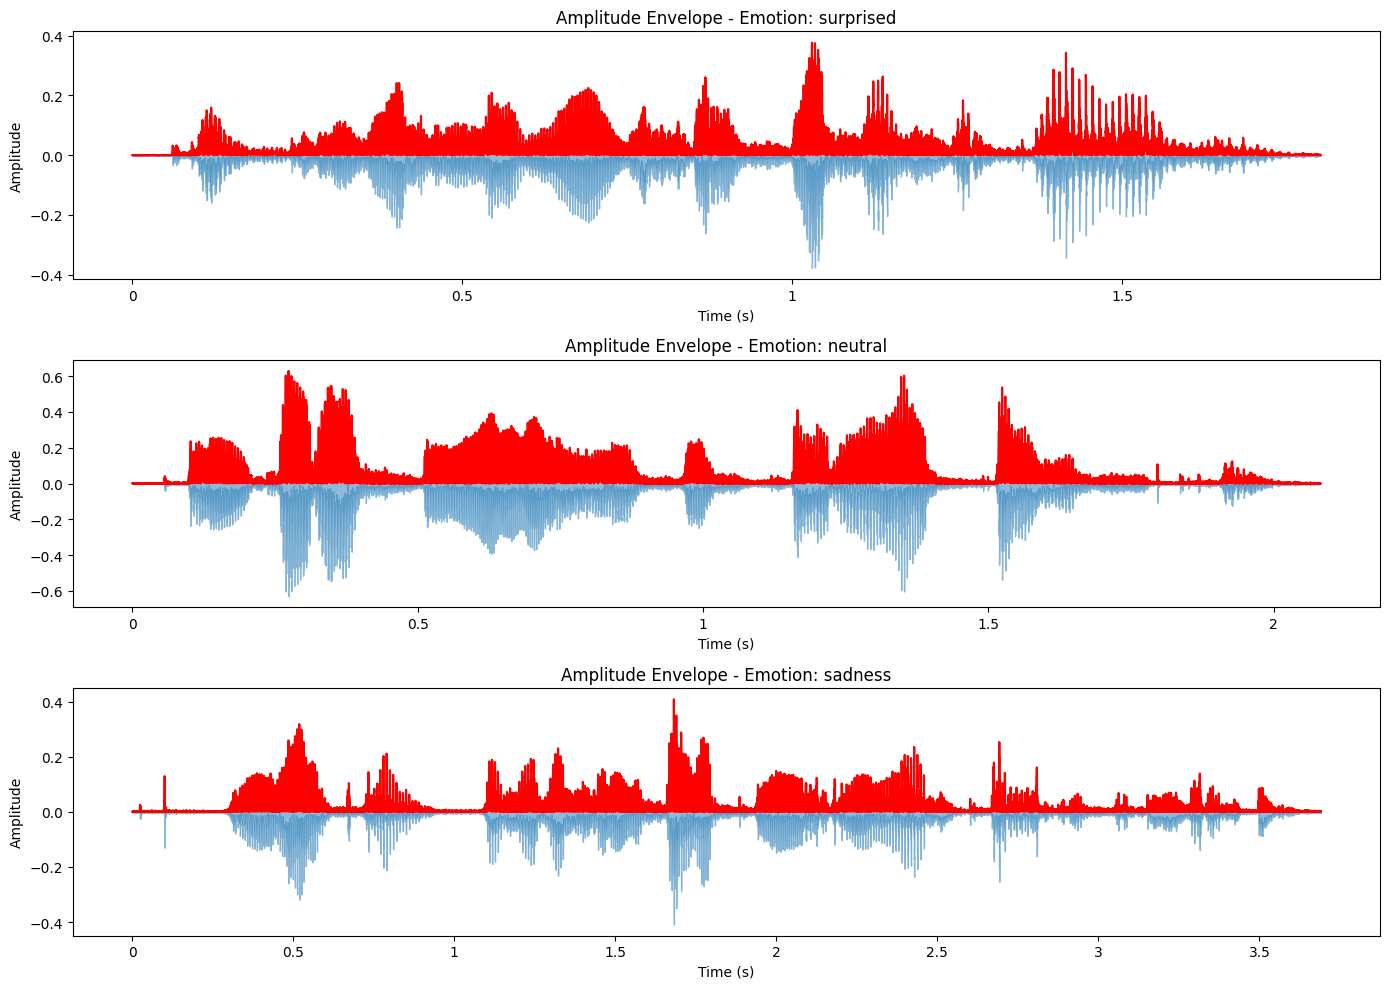

In [15]:
# plotting AE
plt.figure(figsize=(14, 10))

# Amplitude Envelope for surprised
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_data_surprised, sr=sr_surprised, alpha=0.5)
plt.plot(np.linspace(0, len(audio_data_surprised)/sr_surprised, num=len(ae_surprised)), ae_surprised, color='r')
plt.title(f'Amplitude Envelope - Emotion: {emotion_surprised}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Amplitude Envelope for neutral
plt.subplot(3, 1, 2)
librosa.display.waveshow(audio_data_neutral, sr=sr_neutral, alpha=0.5)
plt.plot(np.linspace(0, len(audio_data_neutral)/sr_neutral, num=len(ae_neutral)), ae_neutral, color='r')
plt.title(f'Amplitude Envelope - Emotion: {emotion_neutral}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


# Amplitude Envelope for sadness
plt.subplot(3, 1, 3)
librosa.display.waveshow(audio_data_sadness, sr=sr_sadness, alpha=0.5)
plt.plot(np.linspace(0, len(audio_data_sadness)/sr_sadness, num=len(ae_sadness)), ae_sadness, color='r')
plt.title(f'Amplitude Envelope - Emotion: {emotion_sadness}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
